In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from data_analysis import extratreesclassifier_model

In [2]:
# import data
df = pd.read_csv('sports_management_encoded.csv')
df.head(10)

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,2.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,2.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
# get an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 20 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Energy Consumption                         102000 non-null  float64
 1   Carbon Emissions                           102000 non-null  float64
 2   Waste Generation                           102000 non-null  float64
 3   Community Engagement                       102000 non-null  float64
 4   Volunteer Participation                    102000 non-null  float64
 5   Health Impact                              102000 non-null  float64
 6   Water Usage                                102000 non-null  float64
 7   Material Recycling Rate                    102000 non-null  float64
 8   Operational Cost Efficiency                102000 non-null  float64
 9   Sustainability Score                       102000 non-null  float64
 10  Social I

In [4]:
# identify outliers
df.describe()


,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
count,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000
mean,1.449951,1.601686,1.301931,0.997794,0.701804,0.998794,0.903931,0.801157,1.001304,1.296912,0.999618,1.000980,0.249951,0.350667,0.100667,0.198451,0.200294,0.099735,0.198157,0.200951
std,0.740396,0.663294,0.780102,0.774477,0.779735,0.705770,0.699665,0.749232,0.708778,0.780382,0.773771,0.705569,0.432987,0.477181,0.300888,0.398835,0.400222,0.299648,0.398613,0.400713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# calculate z-scores
z_scores = (df - df.mean()) / df.std()
z_scores.head(10)


,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,-0.607716,0.600509,0.894843,0.002848,0.382432,0.001709,0.137307,0.265396,1.40904,-1.661893,1.292866,-0.001390,-0.577272,-0.734871,-0.334565,-0.497576,-0.500457,3.004405,-0.497116,-0.501483
1,0.742912,-0.907119,0.894843,0.002848,-0.900054,-1.415184,0.137307,-1.069303,-0.00184,-0.380470,-1.291878,-0.001390,1.732269,-0.734871,-0.334565,-0.497576,-0.500457,-0.332841,2.011583,-0.501483
2,0.742912,0.600509,0.894843,-1.288346,1.664919,0.001709,0.137307,0.265396,-0.00184,0.900954,-1.291878,1.415907,1.732269,-0.734871,-0.334565,-0.497576,-0.500457,-0.332841,2.011583,-0.501483
3,0.742912,0.600509,0.894843,0.002848,0.382432,0.001709,0.137307,0.265396,-0.00184,0.900954,-1.291878,1.415907,-0.577272,1.360769,-0.334565,-0.497576,-0.500457,-0.332841,2.011583,-0.501483
4,-0.607716,0.600509,-1.668925,-1.288346,-0.900054,0.001709,1.566563,1.600095,1.40904,-1.661893,0.000494,-0.001390,-0.577272,1.360769,-0.334565,-0.497576,-0.500457,-0.332841,-0.497116,-0.501483
5,-0.607716,-0.907119,0.894843,0.002848,1.664919,-1.415184,0.137307,-1.069303,-0.00184,0.900954,-1.291878,-0.001390,-0.577272,1.360769,-0.334565,-0.497576,-0.500457,-0.332841,-0.497116,-0.501483
6,-1.958344,0.600509,-0.387041,0.002848,-0.900054,0.001709,0.137307,0.265396,1.40904,0.900954,0.000494,-0.001390,-0.577272,1.360769,-0.334565,-0.497576,1.998154,-0.332841,-0.497116,1.994066
7,0.742912,0.600509,-0.387041,1.294042,-0.900054,1.418601,-1.291950,-1.069303,1.40904,-0.380470,1.292866,-1.418686,1.732269,-0.734871,-0.334565,-0.497576,-0.500457,-0.332841,2.011583,-0.501483
8,0.742912,0.600509,-0.387041,1.294042,0.382432,1.418601,-1.291950,-1.069303,-0.00184,-0.380470,-1.291878,-1.418686,-0.577272,-0.734871,-0.334565,-0.497576,-0.500457,-0.332841,-0.497116,1.994066
9,0.742912,0.600509,0.894843,0.002848,1.664919,0.001709,-1.291950,-1.069303,1.40904,-1.661893,0.000494,-0.001390,-0.577272,-0.734871,-0.334565,2.009723,-0.500457,-0.332841,-0.497116,-0.501483


In [6]:
# identify outliers
outliers = z_scores[abs(z_scores) > 3].dropna()
outliers.head(10)

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused


In [7]:
# use IQR to identify outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Energy Consumption                           1.0
Carbon Emissions                             1.0
Waste Generation                             1.0
Community Engagement                         2.0
Volunteer Participation                      1.0
Health Impact                                0.0
Water Usage                                  1.0
Material Recycling Rate                      1.0
Operational Cost Efficiency                  2.0
Sustainability Score                         1.0
Social Impact Level                          2.0
Resource Efficiency                          0.0
Event Scale_National                         0.0
Event Scale_Regional                         1.0
Event Focus_Health-Oriented                  0.0
Event Focus_Recreational                     0.0
Event Focus_Youth-Focused                    0.0
Event Type Classification_Health-Oriented    0.0
Event Type Classification_Recreational       0.0
Event Type Classification_Youth-Focused      0.0
dtype: float64

In [8]:
# identify outliers
outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].dropna(how='all')
outliers.head(10)


,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
7,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
8,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [9]:
# how many outliers are there?
outliers.shape


(97079, 20)

In [10]:
# do a log transformation on the data
df_log = np.log(df + 1)
df_log.head(10)



,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,0.693147,1.098612,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,0.000000,1.098612,0.693147,0.000000,0.000000,0.0,0.000000,0.000000,0.693147,0.000000,0.000000
1,1.098612,0.693147,1.098612,0.693147,0.000000,0.000000,0.693147,0.000000,0.693147,0.693147,0.000000,0.693147,0.693147,0.000000,0.0,0.000000,0.000000,0.000000,0.693147,0.000000
2,1.098612,1.098612,1.098612,0.000000,1.098612,0.693147,0.693147,0.693147,0.693147,1.098612,0.000000,1.098612,0.693147,0.000000,0.0,0.000000,0.000000,0.000000,0.693147,0.000000
3,1.098612,1.098612,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,0.000000,1.098612,0.000000,0.693147,0.0,0.000000,0.000000,0.000000,0.693147,0.000000
4,0.693147,1.098612,0.000000,0.000000,0.000000,0.693147,1.098612,1.098612,1.098612,0.000000,0.693147,0.693147,0.000000,0.693147,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.693147,0.693147,1.098612,0.693147,1.098612,0.000000,0.693147,0.000000,0.693147,1.098612,0.000000,0.693147,0.000000,0.693147,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,1.098612,0.693147,0.693147,0.000000,0.693147,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147,0.000000,0.693147,0.0,0.000000,0.693147,0.000000,0.000000,0.693147
7,1.098612,1.098612,0.693147,1.098612,0.000000,1.098612,0.000000,0.000000,1.098612,0.693147,1.098612,0.000000,0.693147,0.000000,0.0,0.000000,0.000000,0.000000,0.693147,0.000000
8,1.098612,1.098612,0.693147,1.098612,0.693147,1.098612,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.693147
9,1.098612,1.098612,1.098612,0.693147,1.098612,0.693147,0.000000,0.000000,1.098612,0.000000,0.693147,0.693147,0.000000,0.000000,0.0,0.693147,0.000000,0.000000,0.000000,0.000000


In [11]:
# calculate IQR for the log-transformed data
Q1_log = df_log.quantile(0.25)
Q3_log = df_log.quantile(0.75)
IQR_log = Q3_log - Q1_log
IQR_log


Energy Consumption                           0.405465
Carbon Emissions                             0.405465
Waste Generation                             0.405465
Community Engagement                         1.098612
Volunteer Participation                      0.693147
Health Impact                                0.000000
Water Usage                                  0.693147
Material Recycling Rate                      0.693147
Operational Cost Efficiency                  1.098612
Sustainability Score                         0.405465
Social Impact Level                          1.098612
Resource Efficiency                          0.000000
Event Scale_National                         0.000000
Event Scale_Regional                         0.693147
Event Focus_Health-Oriented                  0.000000
Event Focus_Recreational                     0.000000
Event Focus_Youth-Focused                    0.000000
Event Type Classification_Health-Oriented    0.000000
Event Type Classification_Re

In [12]:
# identify outliers in the log-transformed data
outliers_log = df_log[(df_log < (Q1_log - 1.5 * IQR_log)) | (df_log > (Q3_log + 1.5 * IQR_log))].dropna(how='all')
outliers_log.head(10)


,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693147,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.693147,NaN,NaN,NaN,NaN,NaN,0.693147,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.098612,0.693147,NaN,NaN,NaN,NaN,NaN,0.693147,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.098612,NaN,NaN,NaN,NaN,NaN,NaN,0.693147,NaN
4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693147,NaN,NaN,0.693147
7,NaN,NaN,NaN,NaN,NaN,1.098612,NaN,NaN,NaN,NaN,NaN,0.000000,0.693147,NaN,NaN,NaN,NaN,NaN,0.693147,NaN
8,NaN,NaN,NaN,NaN,NaN,1.098612,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693147
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.693147,NaN,NaN,NaN,NaN


In [13]:
# how many outliers are there?
outliers_log.shape

(99553, 20)

In [14]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head(10)


,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,-0.607719,0.600512,0.894847,0.002848,0.382434,0.001709,0.137307,0.265397,1.409047,-1.661901,1.292873,-0.001390,-0.577275,-0.734875,-0.334567,-0.497578,-0.500460,3.004420,-0.497118,-0.501485
1,0.742915,-0.907124,0.894847,0.002848,-0.900059,-1.415191,0.137307,-1.069309,-0.001840,-0.380472,-1.291884,-0.001390,1.732277,-0.734875,-0.334567,-0.497578,-0.500460,-0.332843,2.011593,-0.501485
2,0.742915,0.600512,0.894847,-1.288352,1.664927,0.001709,0.137307,0.265397,-0.001840,0.900958,-1.291884,1.415913,1.732277,-0.734875,-0.334567,-0.497578,-0.500460,-0.332843,2.011593,-0.501485
3,0.742915,0.600512,0.894847,0.002848,0.382434,0.001709,0.137307,0.265397,-0.001840,0.900958,-1.291884,1.415913,-0.577275,1.360776,-0.334567,-0.497578,-0.500460,-0.332843,2.011593,-0.501485
4,-0.607719,0.600512,-1.668933,-1.288352,-0.900059,0.001709,1.566571,1.600103,1.409047,-1.661901,0.000494,-0.001390,-0.577275,1.360776,-0.334567,-0.497578,-0.500460,-0.332843,-0.497118,-0.501485
5,-0.607719,-0.907124,0.894847,0.002848,1.664927,-1.415191,0.137307,-1.069309,-0.001840,0.900958,-1.291884,-0.001390,-0.577275,1.360776,-0.334567,-0.497578,-0.500460,-0.332843,-0.497118,-0.501485
6,-1.958354,0.600512,-0.387043,0.002848,-0.900059,0.001709,0.137307,0.265397,1.409047,0.900958,0.000494,-0.001390,-0.577275,1.360776,-0.334567,-0.497578,1.998164,-0.332843,-0.497118,1.994076
7,0.742915,0.600512,-0.387043,1.294048,-0.900059,1.418608,-1.291956,-1.069309,1.409047,-0.380472,1.292873,-1.418693,1.732277,-0.734875,-0.334567,-0.497578,-0.500460,-0.332843,2.011593,-0.501485
8,0.742915,0.600512,-0.387043,1.294048,0.382434,1.418608,-1.291956,-1.069309,-0.001840,-0.380472,-1.291884,-1.418693,-0.577275,-0.734875,-0.334567,-0.497578,-0.500460,-0.332843,-0.497118,1.994076
9,0.742915,0.600512,0.894847,0.002848,1.664927,0.001709,-1.291956,-1.069309,1.409047,-1.661901,0.000494,-0.001390,-0.577275,-0.734875,-0.334567,2.009733,-0.500460,-0.332843,-0.497118,-0.501485


In [15]:
# IQR for the scaled data
Q1_scaled = df_scaled.quantile(0.25)
Q3_scaled = df_scaled.quantile(0.75)
IQR_scaled = Q3_scaled - Q1_scaled
IQR_scaled


Energy Consumption                           1.350635
Carbon Emissions                             1.507636
Waste Generation                             1.281890
Community Engagement                         2.582400
Volunteer Participation                      1.282493
Health Impact                                0.000000
Water Usage                                  1.429263
Material Recycling Rate                      1.334706
Operational Cost Efficiency                  2.821773
Sustainability Score                         1.281430
Social Impact Level                          2.584757
Resource Efficiency                          0.000000
Event Scale_National                         0.000000
Event Scale_Regional                         2.095651
Event Focus_Health-Oriented                  0.000000
Event Focus_Recreational                     0.000000
Event Focus_Youth-Focused                    0.000000
Event Type Classification_Health-Oriented    0.000000
Event Type Classification_Re

In [16]:
# identify outliers in the scaled data
outliers_scaled = df_scaled[(df_scaled < (Q1_scaled - 1.5 * IQR_scaled)) | (df_scaled > (Q3_scaled + 1.5 * IQR_scaled))].dropna(how='all')
outliers_scaled.head(10)


,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00442,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,-1.415191,NaN,NaN,NaN,NaN,NaN,NaN,1.732277,NaN,NaN,NaN,NaN,NaN,2.011593,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.415913,1.732277,NaN,NaN,NaN,NaN,NaN,2.011593,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.415913,NaN,NaN,NaN,NaN,NaN,NaN,2.011593,NaN
5,NaN,NaN,NaN,NaN,NaN,-1.415191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.998164,NaN,NaN,1.994076
7,NaN,NaN,NaN,NaN,NaN,1.418608,NaN,NaN,NaN,NaN,NaN,-1.418693,1.732277,NaN,NaN,NaN,NaN,NaN,2.011593,NaN
8,NaN,NaN,NaN,NaN,NaN,1.418608,NaN,NaN,NaN,NaN,NaN,-1.418693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.994076
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.009733,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.418693,NaN,NaN,NaN,2.009733,NaN,NaN,NaN,1.994076


In [17]:
# how many outliers are there?
outliers_scaled.shape

(97079, 20)

In [18]:
# feature engineering
# create a new feature that represents the average of the existing features
df['average'] = df.mean(axis=1)
df.head(10)


,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,...,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused,average
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.80
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.60
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.90
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.90
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65
5,1.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65
6,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.80
7,2.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.80
8,2.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.65
9,2.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75


In [19]:
# drop the average feature
df = df.drop('average', axis=1)

# create a new feature "Waste"  that represents the mean of the existing features - Waste Generation and Water Usage
df['Waste'] = df[['Waste Generation', 'Water Usage']].mean(axis=1)
# create a new feature "Energy" that represents the mean of the existing features - Energy Usage and CO2 Emissions
df['Energy'] = df[['Energy Consumption', 'Carbon Emissions']].mean(axis=1)
df.head(10)


,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,...,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused,Waste,Energy
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.5,1.5
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.5,1.5
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.5,2.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.5,2.0
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.5
5,1.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,1.0
6,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
7,2.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,2.0
8,2.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,2.0
9,2.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0


In [20]:
# outlier detection using the isolation forest algorithm
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.05, random_state=0)
outliers = clf.fit_predict(df)
outliers


array([1, 1, 1, ..., 1, 1, 1])

In [21]:
# how many outliers are there?
df['outlier'] = outliers
df['outlier'].value_counts()


outlier
 1    96900
-1     5100
Name: count, dtype: int64

In [22]:
# IQR for the df
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR


Energy Consumption                           1.0
Carbon Emissions                             1.0
Waste Generation                             1.0
Community Engagement                         2.0
Volunteer Participation                      1.0
Health Impact                                0.0
Water Usage                                  1.0
Material Recycling Rate                      1.0
Operational Cost Efficiency                  2.0
Sustainability Score                         1.0
Social Impact Level                          2.0
Resource Efficiency                          0.0
Event Scale_National                         0.0
Event Scale_Regional                         1.0
Event Focus_Health-Oriented                  0.0
Event Focus_Recreational                     0.0
Event Focus_Youth-Focused                    0.0
Event Type Classification_Health-Oriented    0.0
Event Type Classification_Recreational       0.0
Event Type Classification_Youth-Focused      0.0
Waste               

In [27]:
# drop the outlier column if it exists
if 'outlier' in df.columns:
	df = df.drop('outlier', axis=1)

# IQR for the df
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# identify outliers
outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].dropna(how='all')
outliers.head(10)


,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,...,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused,Waste,Energy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN


In [28]:
# how many outliers are there?
outliers.shape


(97377, 22)

In [29]:
# create a new dataframe and drop the Energy Consumption, Carbon Emissions, Waste Generation, and Water Usage columns
df_new = df.drop(['Energy Consumption', 'Carbon Emissions', 'Waste Generation', 'Water Usage'], axis=1)
df_new.head(10)

# calculate the outliers using the IQR method
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
IQR


Community Engagement                         2.0
Volunteer Participation                      1.0
Health Impact                                0.0
Material Recycling Rate                      1.0
Operational Cost Efficiency                  2.0
Sustainability Score                         1.0
Social Impact Level                          2.0
Resource Efficiency                          0.0
Event Scale_National                         0.0
Event Scale_Regional                         1.0
Event Focus_Health-Oriented                  0.0
Event Focus_Recreational                     0.0
Event Focus_Youth-Focused                    0.0
Event Type Classification_Health-Oriented    0.0
Event Type Classification_Recreational       0.0
Event Type Classification_Youth-Focused      0.0
Waste                                        0.5
Energy                                       1.0
dtype: float64

In [30]:
# how many outliers are there?
outliers = df_new[(df_new < (Q1 - 1.5 * IQR)) | (df_new > (Q3 + 1.5 * IQR))].dropna(how='all')
outliers.shape


(97377, 18)

In [31]:
# create VIF function
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['feature'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data



In [32]:
# calculate the VIF for the df_new
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = calculate_vif(df_new)
vif_data



,feature,VIF
0,Community Engagement,2.518186
1,Volunteer Participation,1.765564
2,Health Impact,2.815474
3,Material Recycling Rate,2.068405
4,Operational Cost Efficiency,2.812739
5,Sustainability Score,3.443412
6,Social Impact Level,2.536418
7,Resource Efficiency,2.824676
8,Event Scale_National,1.578861
9,Event Scale_Regional,1.809414


Scores for the Model

Training Score: 0.949437908496732
Testing Score: 0.4157647058823529


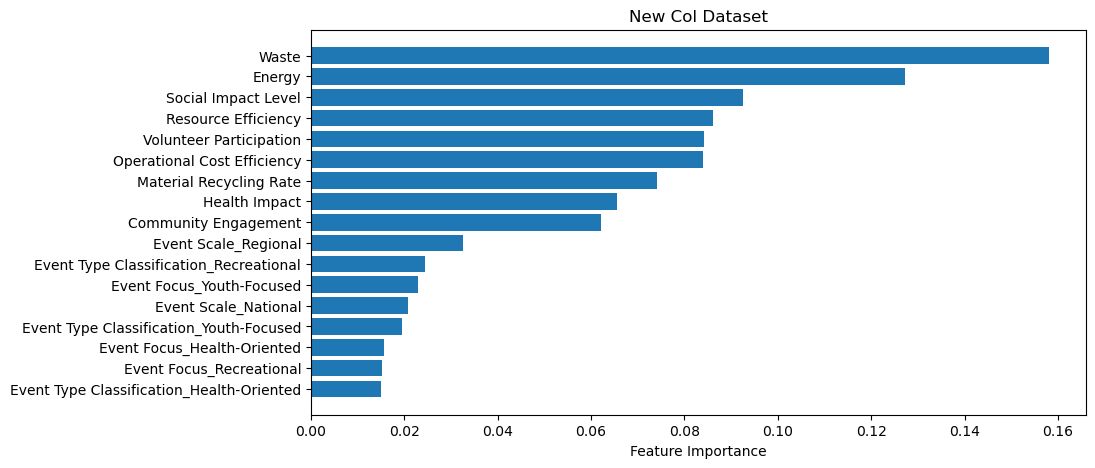

Classification Report

              precision    recall  f1-score   support

         0.0       0.19      0.11      0.14      5081
         1.0       0.31      0.23      0.26      7877
         2.0       0.49      0.65      0.56     12542

    accuracy                           0.42     25500
   macro avg       0.33      0.33      0.32     25500
weighted avg       0.38      0.42      0.39     25500

Confusion Matrix

[[ 569 1186 3326]
 [ 898 1821 5158]
 [1454 2876 8212]]
Balanced Accuracy Score for Training : 0.9581749645159148
Balanced Accuracy Score for Testing : 0.3326417396511719
Scores for the Model with Random Under Sampling

Training Score RU : 0.9648207335898941
Testing Score RU: 0.33784313725490195
Scores for the Model with Random Over Sampling

Training Score : 0.960765299436509
Testing Score: 0.4170980392156863


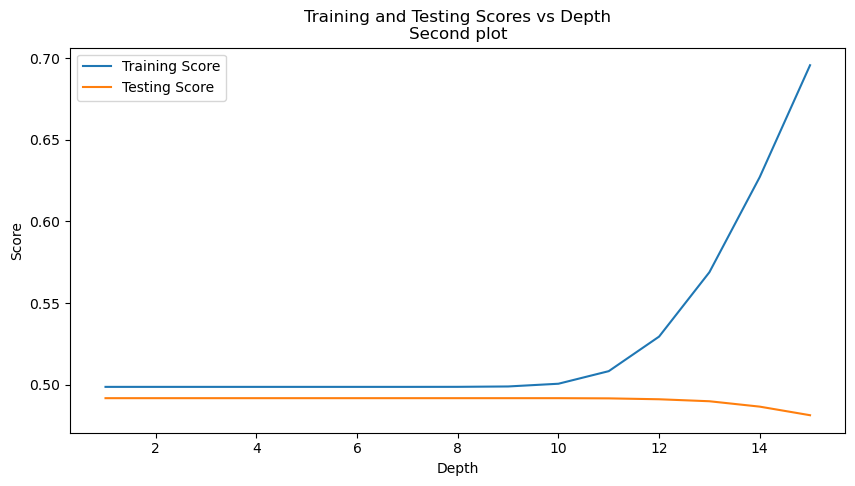

Model: ExtraTreesClassifier
Dataset: Second plot
Training Score: 0.949437908496732
Testing Score: 0.4157647058823529
Balanced Accuracy Score for Training : 0.9581749645159148
Balanced Accuracy Score for Testing : 0.3326417396511719
Training Score Random Undersampling : 0.9648207335898941
Testing Score Random Undersampling: 0.33784313725490195
Training Score Random Oversampling : 0.960765299436509
Testing Score Random Oversampling: 0.4170980392156863


In [34]:
# extra trees classifier

X = df_new.drop('Sustainability Score', axis=1)
y = df_new['Sustainability Score']
extratreesclassifier_model(X, y, 42, 'New Col Dataset', 'Second plot')
